# 연습문제

## 작업 준비

### 패키지 참조

In [24]:
import os, sys
sys.path.append("../../")
import helper

from pca import pca
from pandas import read_excel, DataFrame, merge, melt, concat
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


### 그래프 한글 설정

In [25]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (15, 5)
plt.rcParams["axes.unicode_minus"] = False

## 문제 1

아래의 데이터는 콩의 수분 함유량에 따른 강도를 조사한 데이터이다.

https://data.hossam.kr/E04/beans.xlsx

위의 데이터를 다항선형회귀모델을 적용하여 분석으로 설명력/에러율/결과표를 제시한 후, 수분함유량에 따른 강도의 산점도와 추세선을 시각화 하라.

표준화는 적용하지 않습니다.

### 1) 콩의 수분 함유량에 따른 강도 조사 데이터 분석

#### 데이터 가져오기

In [26]:
origin = read_excel("https://data.hossam.kr/E04/beans.xlsx")
origin = concat([origin, origin^2, origin^3, origin^4])
origin.reset_index(drop=True, inplace=True)
origin.shape

(40, 2)

#### 회귀분석 수행

In [27]:
ols = helper.ml_ols(origin, xnames="수분함유량", yname="강도", degree=2, test_size=0.3)

print("계수: ", ols.coef)
print("절편: ", ols.intercept)
print("훈련데이터의 설명력: ", ols.trainRegMetric.r2)

print("R^2: ", ols.trainRegMetric.r2)
print("MAE: ", ols.trainRegMetric.mae)
print("MSE: ", ols.trainRegMetric.mse)
print("RMSE: ", ols.trainRegMetric.rmse)
print("MAPE: ", ols.trainRegMetric.mape)
print("MPE: ", ols.trainRegMetric.mpe)

helper.prettyPrint(ols.table)

계수:  [-2.70994363  0.04655621]
절편:  65.89184790164555
훈련데이터의 설명력:  0.8051396273996146
R^2:  0.8051396273996146
MAE:  1.58472181683643
MSE:  3.964812071073147
RMSE:  1.9911835854770266
MAPE:  5.345915255251178
MPE:  -0.4195318581549131
+----+------------+--------------+-----------+------------+-----+----------+------------+---------+
|    | 종속변수   | 독립변수     |         B |   표준오차 |   β |        t |   유의확률 |     VIF |
|----+------------+--------------+-----------+------------+-----+----------+------------+---------|
|  0 | 강도       | 수분함유량   |  -2.70994 |   0.870251 |   0 | -3.11398 | 0.00355387 | 207.413 |
|  1 | 강도       | 수분함유량^2 | 0.0465562 |  0.0120618 |   0 |  3.85981 | 0.00043951 | 57.5318 |
+----+------------+--------------+-----------+------------+-----+----------+------------+---------+


#### 시각화

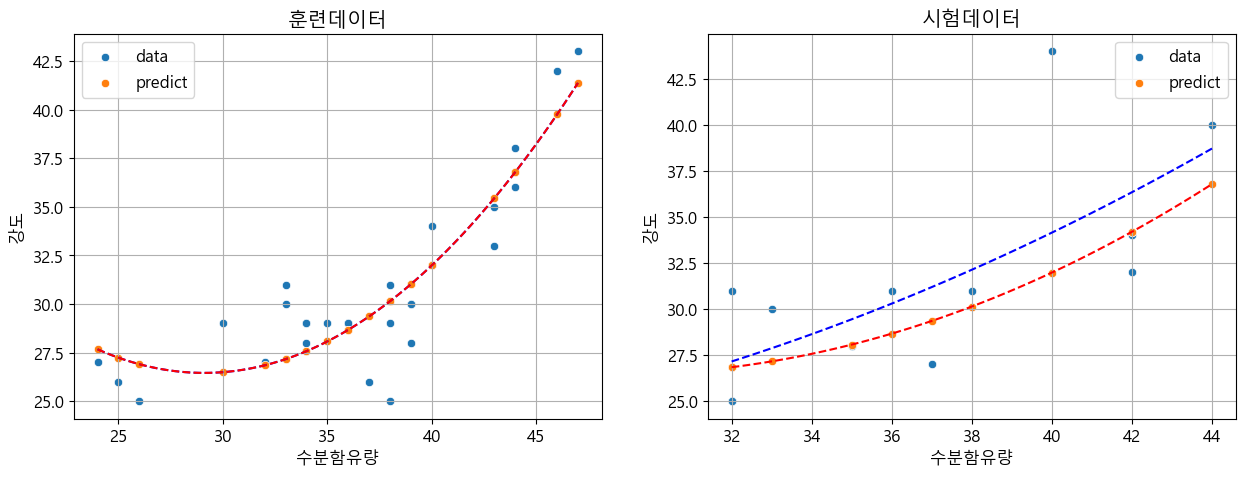

In [28]:
helper.regplot(ols.x_train['수분함유량'], ols.y_train, ols.train_pred, "훈련데이터",
               ols.x_test['수분함유량'], ols.y_test, ols.test_pred, "시험데이터",
               figsize=(15, 5))

In [31]:
# 설명력
olsResult = ml_ols(origin, xnames='수분함유량', yname='강도', degree=1, test_size=0.3, random_state=123)

print('계수 :',olsResult.coef)
print('절편 :',olsResult.intercept)

계수 : [0.59817509]
절편 : 8.701997533908749


In [32]:
# 에러율 - 훈련데이터
print('R^2 :',olsResult.trainRegMetric.r2)
print('MAE :',olsResult.trainRegMetric.mae)
print('MSE :',olsResult.trainRegMetric.mse)
print('RMSE :',olsResult.trainRegMetric.rmse)
print('MAPE :',olsResult.trainRegMetric.mape)
print('MPE :',olsResult.trainRegMetric.mpe)

R^2 : 0.45707330655105216
MAE : 2.400440373436674
MSE : 10.991495508190946
RMSE : 3.3153424420700413
MAPE : 7.795888203624427
MPE : -0.9952908259406839


In [33]:
# 에러율 - 검증데이터
print('R^2 :',olsResult.testRegMetric.r2)
print('MAE :',olsResult.testRegMetric.mae)
print('MSE :',olsResult.testRegMetric.mse)
print('RMSE :',olsResult.testRegMetric.rmse)
print('MAPE :',olsResult.testRegMetric.mape)
print('MPE :',olsResult.testRegMetric.mpe)

R^2 : 0.6468654052192033
MAE : 2.410768598438142
MSE : 9.936815125359638
RMSE : 3.152271423174032
MAPE : 7.246503282258005
MPE : 1.748512852349889
